In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hiccu\OneDrive\Documents\Accredian\fraud-detedtion\data\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
print("Shape (rows,columns):",df.shape)

Shape (rows,columns): (6362620, 11)


In [4]:
print("\nColumns:\n",df.columns.tolist())


Columns:
 ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [5]:
print("\nFraud value counts:")
print(df["isFraud"].value_counts())


Fraud value counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [6]:
fraud_rate = df["isFraud"].mean() * 100
print(f"\nFraud percentage: {fraud_rate:.4f}%")


Fraud percentage: 0.1291%


In [7]:
print("\nFlagged fraud value counts:")
print(df["isFlaggedFraud"].value_counts())


Flagged fraud value counts:
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


Normal transactions: 6354407
Fraud transactions: 8213


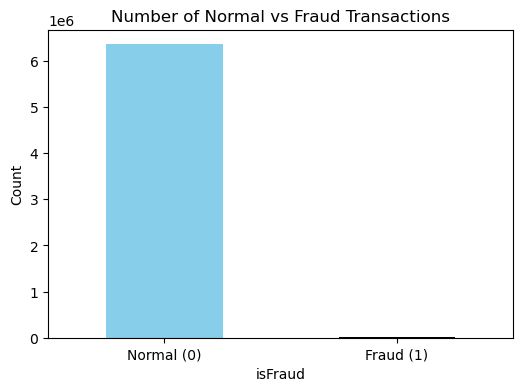

In [8]:
import matplotlib.pyplot as plt
fraud_counts = df["isFraud"].value_counts()

plt.figure(figsize=(6,4))
fraud_counts.plot(kind="bar",color=["skyblue","black"])
plt.title("Number of Normal vs Fraud Transactions")
plt.xticks(ticks=[0,1], labels=["Normal (0)", "Fraud (1)"], rotation=0)
plt.ylabel("Count")


print("Normal transactions:", fraud_counts[0])
print("Fraud transactions:", fraud_counts[1])

plt.savefig("fraud_vs_normal.png")

plt.show()
plt.close()

        

In [9]:
#checking missing values in dattaset : 
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal mising values:",df.isnull().sum().sum())

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Total mising values: 0


In [10]:
print("Transaction type counts:")
print(df["type"].value_counts())

Transaction type counts:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [11]:
print("\nFraud counts by type:")
print(df.groupby("type")["isFraud"].sum())


Fraud counts by type:
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


In [12]:
fraud_rate_by_type = df.groupby("type")["isFraud"].mean()*100
print("\nFraud rate (%) by type:")
print(fraud_rate_by_type)


Fraud rate (%) by type:
type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


In [13]:
df["balance_diff_dest"] = df["oldbalanceDest"]+df["amount"]-df["newbalanceDest"]

In [14]:
print("Sample of balance difference (destination): ")
print(df[["oldbalanceDest", "amount", "newbalanceDest", "balance_diff_dest"]].head())

Sample of balance difference (destination): 
   oldbalanceDest    amount  newbalanceDest  balance_diff_dest
0             0.0   9839.64             0.0            9839.64
1             0.0   1864.28             0.0            1864.28
2             0.0    181.00             0.0             181.00
3         21182.0    181.00             0.0           21363.00
4             0.0  11668.14             0.0           11668.14


In [15]:
avg_diff_dest = df.groupby("isFraud")["balance_diff_dest"].mean()
print("\nAverage balance difference (Destination account):")
print(avg_diff_dest)


Average balance difference (Destination account):
isFraud
0     54692.231734
1    732509.301069
Name: balance_diff_dest, dtype: float64


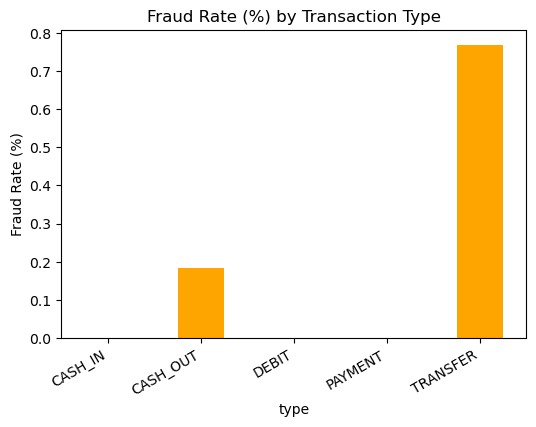

In [16]:
fraud_rate_by_type = df.groupby("type")["isFraud"].mean() * 100
plt.figure(figsize=(6,4))
fraud_rate_by_type.plot(kind="bar", color="orange")
plt.title("Fraud Rate (%) by Transaction Type")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=30, ha="right")

plt.savefig("fraud_rate_by_transaction.png")

plt.show()
plt.close()

### Interpretation of Key Fraud Predictors

- **Transaction Type (e.g., CASH_OUT, TRANSFER):** These show higher fraud rates because fraudulent actors often try to move money quickly via direct transfers or cash withdrawals.
- **Old and New Balance Differences:** Large discrepancies between old balance, transaction amount, and new balance often indicate unusual activity. Fraudulent transactions often result in unrealistic or inconsistent balance updates.
- **Transaction Amount:** Very high transaction amounts are more likely to be fraudulent compared to smaller everyday transactions.
- **Destination Balance Features:** Fraudsters frequently transfer money into accounts with unusual balance behaviors (sudden jumps or large empty-to-full transactions).

**Conclusion:**  
These predictors make sense in the fraud detection context because they capture transaction patterns that deviate from typical customer behavior. Fraudulent activity usually involves higher transaction amounts, direct transfers/cash-outs, and suspicious balance inconsistencies.


### Fraud Prevention Recommendations

Based on the fraud detection model and insights:

1. **Real-Time Monitoring:**  
   Deploy real-time monitoring systems to flag high-value or unusual transactions (e.g., sudden large transfers or cash-outs).

2. **Transaction Limits:**  
   Set transaction thresholds (daily or per transaction) for suspicious accounts and trigger verification if limits are exceeded.

3. **Behavioral Analysis:**  
   Track user behavior patterns (time of day, transaction frequency, device used). Sudden deviations should raise alerts.

4. **Multi-Factor Authentication (MFA):**  
   Require additional verification (OTP, biometric) for high-risk transactions.

5. **Account Flagging:**  
   Automatically flag accounts with repeated unusual balance updates or attempted transfers to new/unverified accounts.

6. **Regular Model Retraining:**  
   Continuously update and retrain the fraud detection model with new transaction data to adapt to evolving fraud strategies.


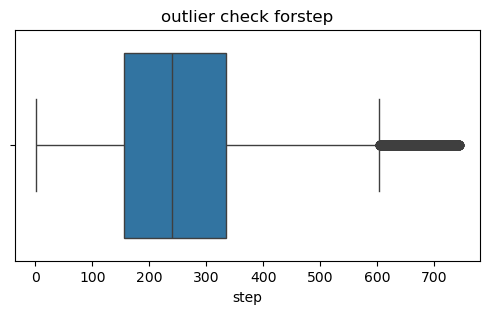

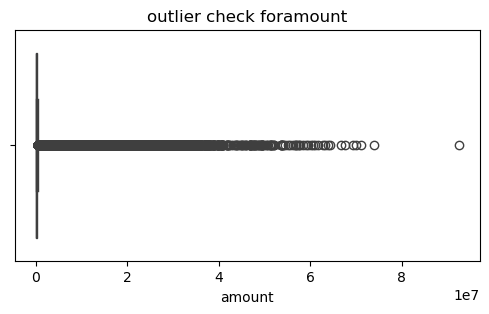

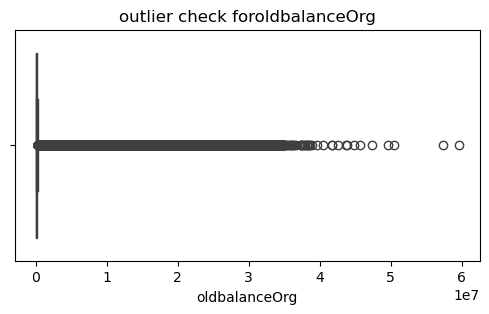

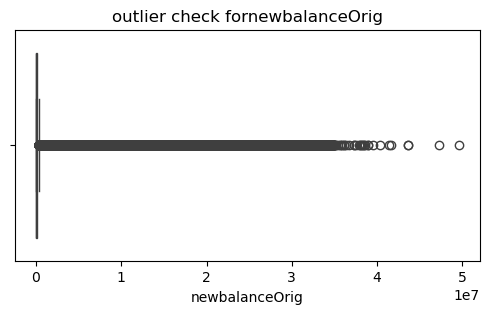

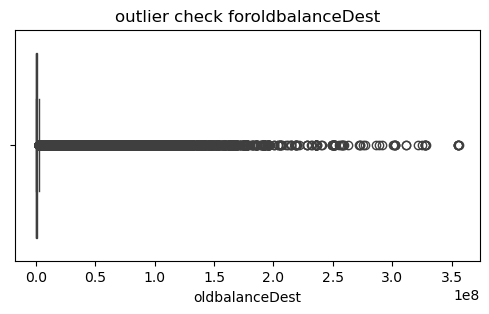

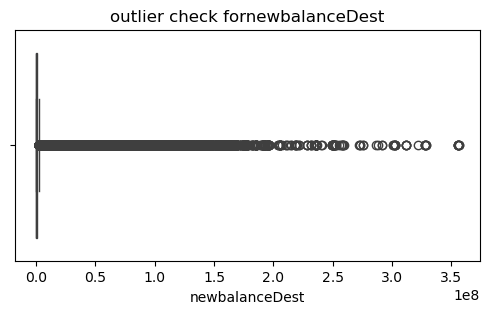

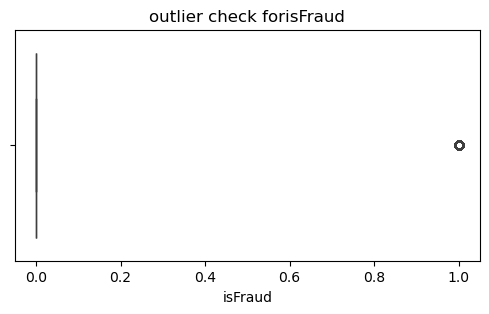

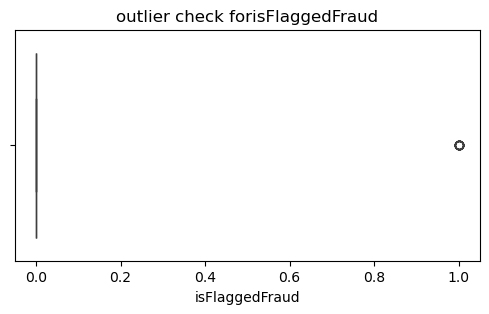

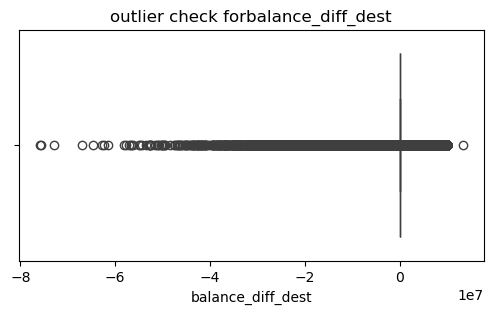

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 
numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"outlier check for{col}")
    plt.show()

In [18]:
# checking multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.select_dtypes(include=["float64", "int64"]).drop("isFraud", axis=1, errors="ignore")
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)

c:\Users\hiccu\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature         VIF
0              const    4.137094
1               step    1.002404
2             amount         inf
3      oldbalanceOrg  430.081653
4     newbalanceOrig  431.127650
5     oldbalanceDest         inf
6     newbalanceDest         inf
7     isFlaggedFraud    1.000586
8  balance_diff_dest         inf


In [19]:
data = df.copy()

In [20]:
data = data.drop(["nameOrig","nameDest"],axis=1)

In [21]:
data = pd.get_dummies(data,columns=["type"],drop_first=True)

In [22]:
data["balance_diff_orig"] = data["oldbalanceOrg"] - data["amount"] - data["newbalanceOrig"]
data["balance_diff_dest"] = data["oldbalanceDest"] + data["amount"] - data["newbalanceDest"]

In [23]:
x = data.drop("isFraud",axis=1)
y = data["isFraud"]

In [24]:
print("Shape of features (x) :",x.shape)
print("Shape of target (y) : ",y.shape)

Shape of features (x) : (6362620, 13)
Shape of target (y) :  (6362620,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
print("Training set:",x_train.shape,"Test set:",x_test.shape)

Training set: (5090096, 13) Test set: (1272524, 13)


In [28]:
model = LogisticRegression(max_iter=1000, class_weight="balanced",solver = "liblinear")

In [29]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [30]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
 [[1216013   54868]
 [    129    1514]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9568    0.9779   1270881
           1     0.0269    0.9215    0.0522      1643

    accuracy                         0.9568   1272524
   macro avg     0.5134    0.9392    0.5150   1272524
weighted avg     0.9986    0.9568    0.9767   1272524



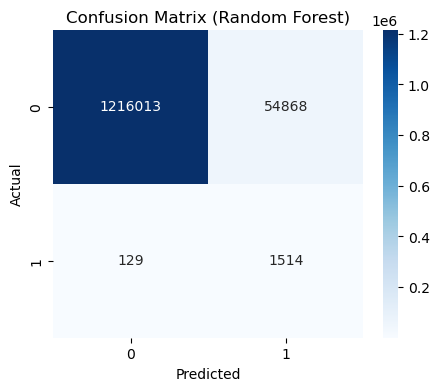

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")

plt.savefig("Confusion_matrix.png")
plt.show()
plt.close()


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
rf_model = RandomForestClassifier(
    n_estimators = 100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [34]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [35]:
y_pred_rf = rf_model.predict(x_test)

In [36]:
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n",classification_report(y_test,y_pred_rf,digits=4))


Confusion Matrix (Random Forest):
 [[1270881       0]
 [      4    1639]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   1270881
           1     1.0000    0.9976    0.9988      1643

    accuracy                         1.0000   1272524
   macro avg     1.0000    0.9988    0.9994   1272524
weighted avg     1.0000    1.0000    1.0000   1272524



In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

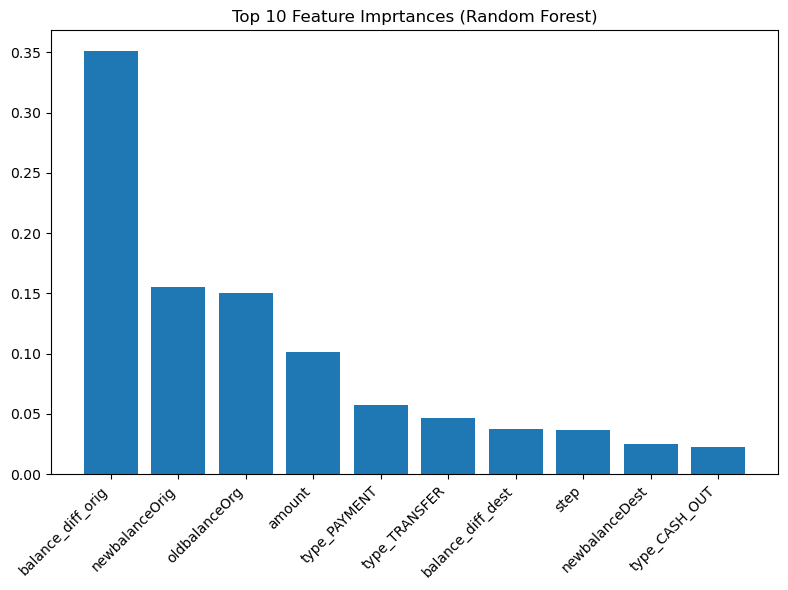

In [39]:
plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Imprtances (Random Forest)")
plt.bar(range(10),importances[indices[:10]],align="center")
plt.xticks(range(10),[features[i] for i in indices[:10]], rotation=45, ha="right")
plt.tight_layout()
plt.savefig("Top_feature_random_forest.png")

plt.show()
plt.close()

### Evaluation of Preventive Actions

To determine whether the implemented fraud prevention measures are effective:

1. **Key Performance Indicators (KPIs):**  
   - Track fraud detection accuracy, precision, recall, and false positive rates before and after implementation.  
   - Monitor fraud loss amount trends over time.

2. **A/B Testing:**  
   - Apply preventive measures to a subset of transactions/accounts while keeping a control group.  
   - Compare fraud detection rates and customer experience across groups.

3. **Post-Implementation Monitoring:**  
   - Continuously monitor flagged vs. confirmed fraud cases.  
   - Ensure false positives remain low so that genuine customers are not inconvenienced.

4. **Customer Feedback:**  
   - Collect feedback from customers flagged for fraud to evaluate if the measures are smooth and non-disruptive.  

5. **Regular Audits:**  
   - Periodically audit fraud cases and system decisions to verify that the measures are aligned with real-world fraud detection goals.

**Conclusion:**  
If fraud losses decrease, detection metrics improve, and genuine customer experience is not heavily impacted, the preventive actions can be considered successful.
